In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
options(scipen=999)

# Sampling registered user revisions to plot out time difference between edits

In [5]:
sample_registered_user_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_registered_user_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [6]:
summary(sample_registered_user_revision_session_data)

      user         timestamp               revision_id       
 300311 : 8471   Min.   :20121029173100   Min.   :       31  
 1529466: 6542   1st Qu.:20140120094300   1st Qu.:103620153  
 24059  : 5784   Median :20150510617300   Median :215142348  
 71094  : 4963   Mean   :20148070627900   Mean   :220227795  
 150965 : 3983   3rd Qu.:20160430095300   3rd Qu.:327568090  
 1554155: 3017   Max.   :20170501221800   Max.   :480585908  
 (Other):67240                                               
        prev_timestamp  session_start             session_end            
 NULL          : 1233   Min.   :20121029170300   Min.   :20121029173300  
 20130405204027:    2   1st Qu.:20140117095900   1st Qu.:20140126061600  
 20130406203103:    2   Median :20150510144900   Median :20150511017900  
 20130413232400:    2   Mean   :20148018077500   Mean   :20148128119000  
 20130507212316:    2   3rd Qu.:20160429081500   3rd Qu.:20160501045700  
 20130508184927:    2   Max.   :20170501194400   Max.   :201

In [7]:
attach(sample_registered_user_revision_session_data)

In [8]:
sample_registered_user_revision_session_data$updated_timestamp <- as.POSIXct(as.character(timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [9]:
sample_registered_user_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [10]:
sample_registered_user_revision_session_data$log_time_difference <- log2(as.numeric(sample_registered_user_revision_session_data$updated_timestamp - sample_registered_user_revision_session_data$updated_previous_timestamp))

In [11]:
head(sample_registered_user_revision_session_data)

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,log_time_difference
300311,20141105032306,170719805,20141105032305,20141101133405,20141105144259,324,260613,224429,2014-11-05 03:23:06,2014-11-05 03:23:05,0
66011,20141023183459,167549092,20141023183459,20141023133532,20141023195449,1468,22682,18492,2014-10-23 18:34:59,2014-10-23 18:34:59,-Inf
18347,20151231211448,287566198,20151231211447,20151231175955,20151231222441,1987,7701,5202,2015-12-31 21:14:48,2015-12-31 21:14:47,0
300311,20151116221153,272824135,20151116221153,20151116175342,20151118152048,578,1171485,131707,2015-11-16 22:11:53,2015-11-16 22:11:53,-Inf
6239,20161012132303,387366648,20161012132302,20161011212550,20161012194536,1237,267971,230996,2016-10-12 13:23:03,2016-10-12 13:23:02,0
300311,20150527200555,219934059,20150527200554,20150520062658,20150529095252,426,2540802,2173978,2015-05-27 20:05:55,2015-05-27 20:05:54,0


Warning message:
“Removed 31353 rows containing non-finite values (stat_bin).”

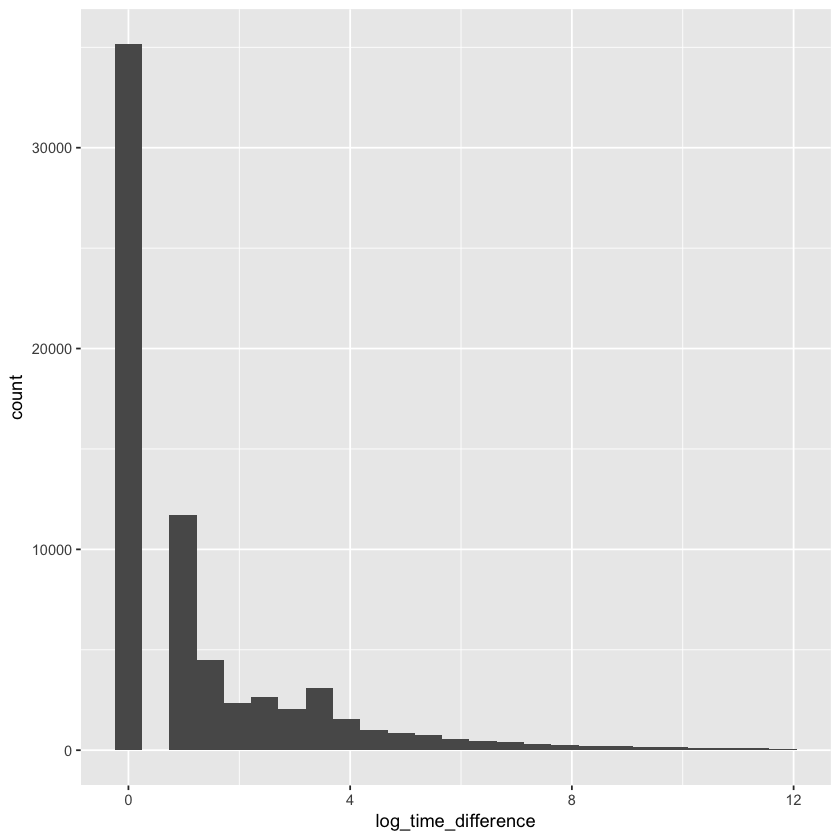

In [12]:
ggplot(sample_registered_user_revision_session_data,aes(x=log_time_difference)) + geom_histogram(bins=25)

In [13]:
rm(sample_registered_user_revision_session_data)

# Sampling anon revisions to plot out time difference between edits

In [14]:
sample_anon_revision_session_data <- data.table(read.table("~/Desktop/100000_sample_revision_session_data.tsv", header=TRUE, sep="\t"))

In [15]:
summary(sample_anon_revision_session_data)

             user         timestamp               revision_id       
 114.183.56.228:  972   Min.   :20121029181800   Min.   :      105  
 10.68.17.174  :  923   1st Qu.:20140117201900   1st Qu.:102949012  
 76.20.25.243  :  603   Median :20150115194100   Median :188322689  
 130.88.141.34 :  507   Mean   :20147761949500   Mean   :218500088  
 217.14.40.189 :  489   3rd Qu.:20160517082800   3rd Qu.:337775010  
 27.119.40.146 :  460   Max.   :20170502053100   Max.   :480652285  
 (Other)       :96046                                               
        prev_timestamp  session_start             session_end            
 NULL          :40345   Min.   :20121029181800   Min.   :20121029181800  
 20130402043740:    2   1st Qu.:20140117195500   1st Qu.:20140117204100  
 20130402045853:    2   Median :20150115194100   Median :20150115194100  
 20130513135722:    2   Mean   :20147761900500   Mean   :20147762013400  
 20130623024112:    2   3rd Qu.:20160517077400   3rd Qu.:20160517083400  
 201

In [16]:
attach(sample_anon_revision_session_data)

The following objects are masked from sample_registered_user_revision_session_data:

    event_index, prev_timestamp, revision_id, session_end,
    session_events, session_index, session_start, timestamp, user



In [17]:
sample_anon_revision_session_data$updated_timestamp <- as.POSIXct(as.character(timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [18]:
sample_anon_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [19]:
sample_anon_revision_session_data$log_time_difference <- log2(as.numeric(sample_anon_revision_session_data$updated_timestamp - sample_anon_revision_session_data$updated_previous_timestamp))

In [20]:
head(sample_anon_revision_session_data)

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,log_time_difference
10.68.17.174,20141126055557,176911222,20141126055506,20141123042702,20141126071956,40,11017,10748,2014-11-26 05:55:57,2014-11-26 05:55:06,5.672425
64.134.6.141,20140731172809,148649153,20140731172702,20140731172251,20140731173420,0,12,8,2014-07-31 17:28:09,2014-07-31 17:27:02,6.066089
91.118.61.134,20140615084306,137928234,NULL,20140615084306,20140615084306,0,1,0,2014-06-15 08:43:06,NA,NA
83.112.25.44,20151005130925,254965567,20151005130816,20151005114556,20151005134736,4,17,6,2015-10-05 13:09:25,2015-10-05 13:08:16,6.108524
46.34.80.184,20141204110226,178983577,20141204110224,20141204110222,20141204110226,1,3,2,2014-12-04 11:02:26,2014-12-04 11:02:24,1.000000
87.170.192.231,20150527172931,219882909,20150527172854,20150527170731,20150527174107,0,30,19,2015-05-27 17:29:31,2015-05-27 17:28:54,5.209453


Warning message:
“Removed 41643 rows containing non-finite values (stat_bin).”

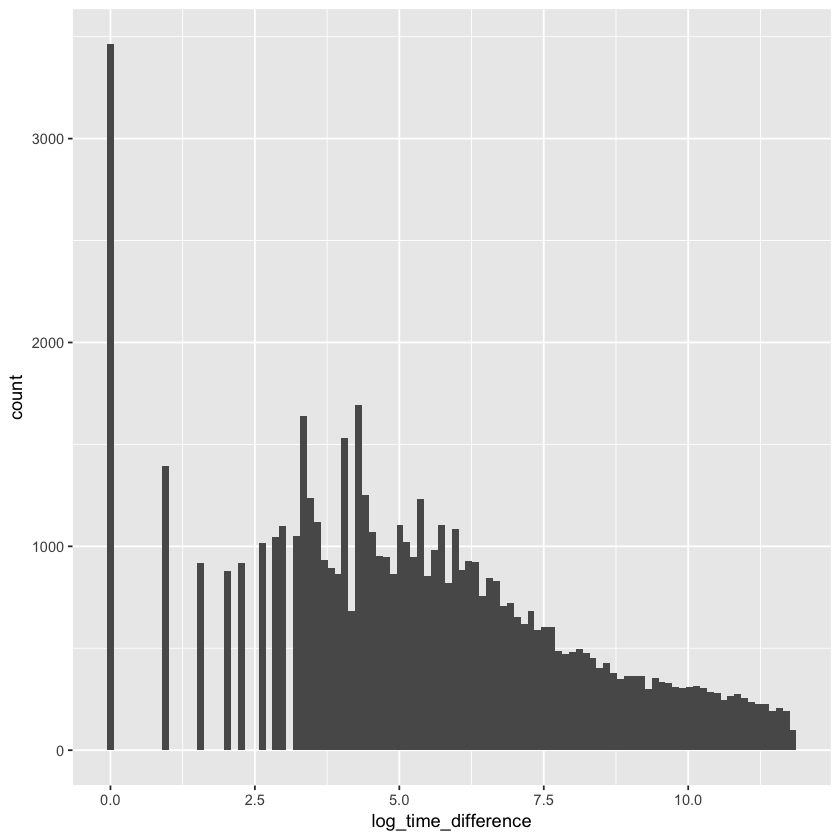

In [21]:
ggplot(sample_anon_revision_session_data,aes(x=log_time_difference)) + geom_histogram(bins=100)

In [22]:
rm(sample_anon_revision_session_data)

# Registered user event lengths

In [23]:
registered_user_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/registered_user_session_data.tsv", header=TRUE, sep="\t"))

In [24]:
attach(registered_user_mwsessions_results)

The following object is masked from sample_anon_revision_session_data:

    user

The following object is masked from sample_registered_user_revision_session_data:

    user



In [25]:
summary(registered_user_mwsessions_results)

      user             start                     end                
 182345 :   8951   Min.   :20121029170300   Min.   :20121029173300  
 161984 :   6452   1st Qu.:20140725074900   1st Qu.:20140725080800  
 131279 :   5545   Median :20150817073900   Median :20150817080500  
 11501  :   5315   Mean   :20150922578000   Mean   :20150922864600  
 150965 :   5243   3rd Qu.:20160705114100   3rd Qu.:20160705120100  
 117788 :   5025   Max.   :20170502122500   Max.   :20170502122800  
 (Other):4803382                                                    
     index            events       
 Min.   :   0.0   Min.   :      1  
 1st Qu.:  42.0   1st Qu.:      1  
 Median : 192.0   Median :      1  
 Mean   : 464.6   Mean   :     82  
 3rd Qu.: 590.0   3rd Qu.:      4  
 Max.   :8950.0   Max.   :5652125  
                                   

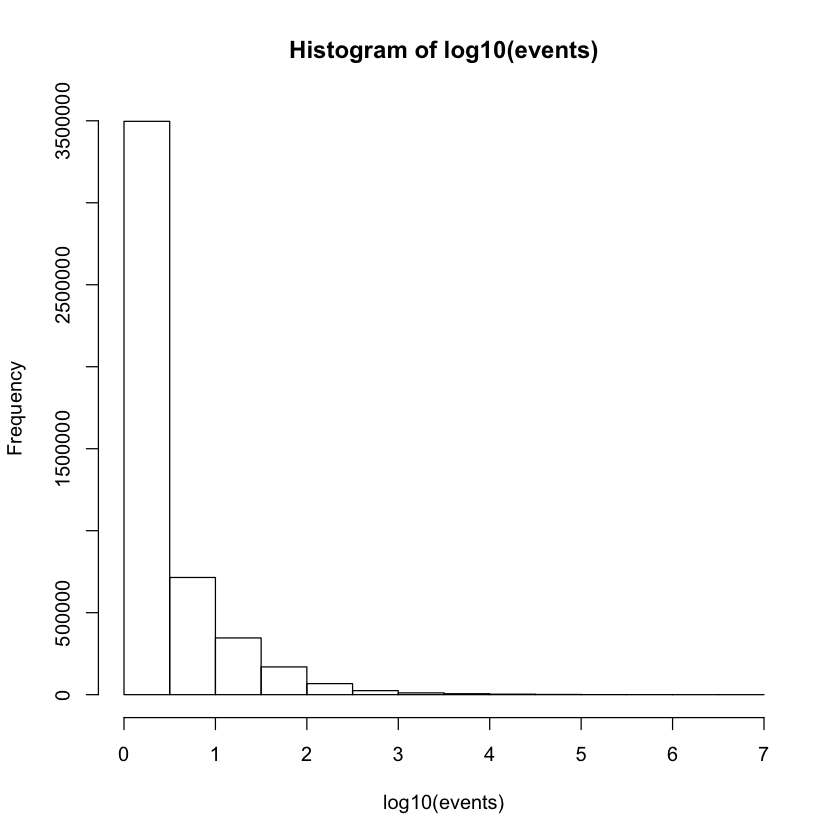

In [26]:
hist(log10(events))

In [27]:
registered_user_mwsessions_results$start_time <- as.POSIXct(as.character(start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [28]:
registered_user_mwsessions_results$end_time <- as.POSIXct(as.character(end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [29]:
registered_user_mwsessions_results$time_difference <- registered_user_mwsessions_results$end_time - registered_user_mwsessions_results$start_time

In [30]:
head(registered_user_mwsessions_results)

user,start,end,index,events,start_time,end_time,time_difference
713,20121029170321,20121029173349,0,14,2012-10-29 17:03:21,2012-10-29 17:33:49,1828 secs
3177,20121029175811,20121029175915,0,2,2012-10-29 17:58:11,2012-10-29 17:59:15,64 secs
3102,20121029180539,20121029180539,0,1,2012-10-29 18:05:39,2012-10-29 18:05:39,0 secs
3244,20121029180827,20121029181543,0,12,2012-10-29 18:08:27,2012-10-29 18:15:43,436 secs
3248,20121029180946,20121029181111,0,4,2012-10-29 18:09:46,2012-10-29 18:11:11,85 secs
2521,20121029181104,20121029181104,0,1,2012-10-29 18:11:04,2012-10-29 18:11:04,0 secs


In [31]:
head(registered_user_mwsessions_results[time_difference >= 36000,])

user,start,end,index,events,start_time,end_time,time_difference
1465,20121031062741,20121031210314,2,10450,2012-10-31 06:27:41,2012-10-31 21:03:14,52533 secs
1467,20121101112526,20121101213423,7,1599,2012-11-01 11:25:26,2012-11-01 21:34:23,36537 secs
1134,20121102185943,20121103054747,6,2435,2012-11-02 18:59:43,2012-11-03 05:47:47,38884 secs
3280,20121111142146,20121113225357,9,21569,2012-11-11 14:21:46,2012-11-13 22:53:57,203531 secs
3280,20121120130810,20121122103206,11,20920,2012-11-20 13:08:10,2012-11-22 10:32:06,163436 secs
3280,20121122113450,20121123203643,12,13982,2012-11-22 11:34:50,2012-11-23 20:36:43,118913 secs


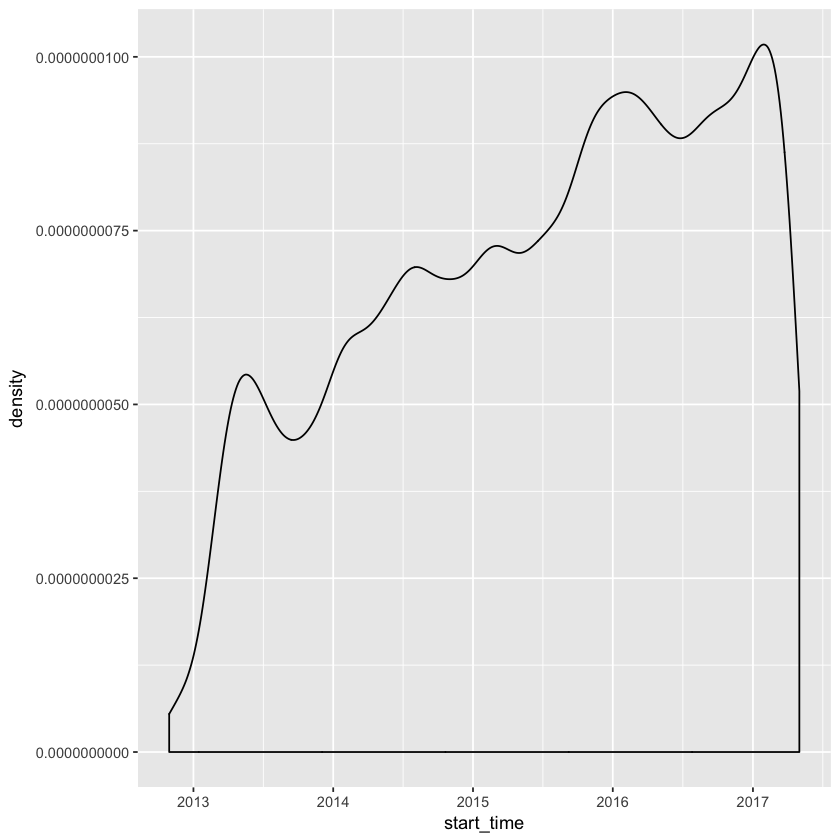

In [32]:
ggplot(registered_user_mwsessions_results[time_difference >= 3*60*60,],aes(x=start_time)) + geom_density()

Warning message in hist(log10(as.numeric(registered_user_mwsessions_results$time_difference))):
“NaNs produced”

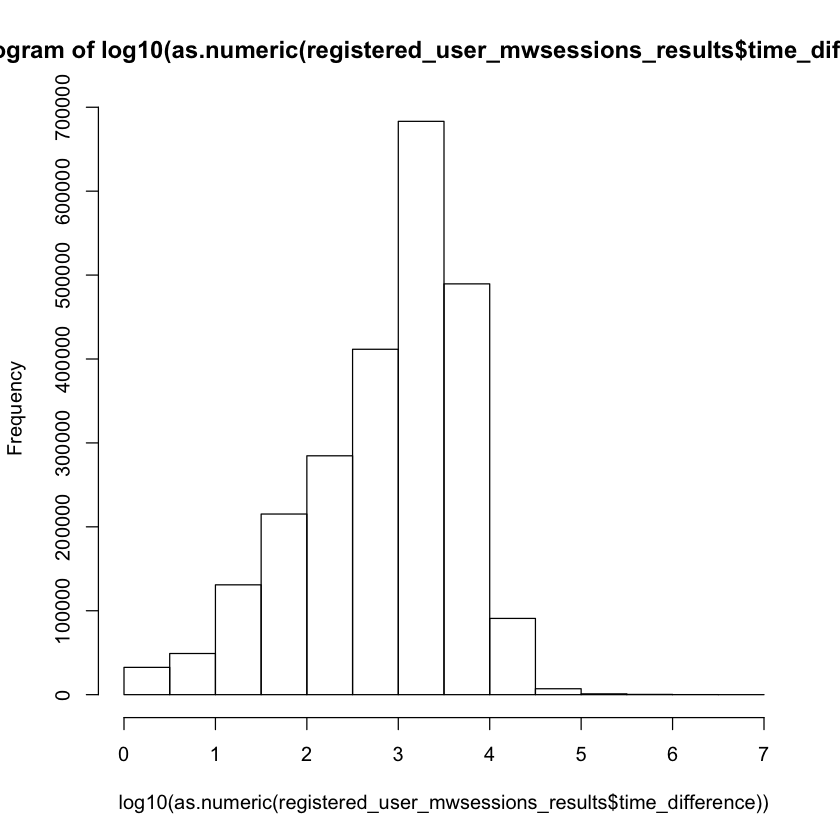

In [33]:
hist(log10(as.numeric(registered_user_mwsessions_results$time_difference)))

In [34]:
rm(registered_user_mwsessions_results)

# Anon event lengths

In [35]:
anon_mwsessions_results <- data.table(read.table("~/Desktop/temp", header=TRUE, sep="\t"))

In [36]:
attach(anon_mwsessions_results)

The following objects are masked from registered_user_mwsessions_results:

    end, events, index, start, user

The following object is masked from sample_anon_revision_session_data:

    user

The following object is masked from sample_registered_user_revision_session_data:

    user



In [37]:
summary(anon_mwsessions_results)

             user            start                     end                
 77.56.53.183  :  1913   Min.   :20121029172800   Min.   :20121029180500  
 212.96.182.2  :  1599   1st Qu.:20131208195300   1st Qu.:20131208199100  
 221.94.14.18  :  1060   Median :20141113101600   Median :20141113102800  
 78.66.239.141 :   809   Mean   :20146545493100   Mean   :20146545515000  
 119.206.54.240:   788   3rd Qu.:20160330142500   3rd Qu.:20160330142600  
 77.92.198.114 :   746   Max.   :20170502103800   Max.   :20170502103800  
 (Other)       :626213                                                    
     index             events         
 Min.   :   0.00   Min.   :    1.000  
 1st Qu.:   0.00   1st Qu.:    1.000  
 Median :   0.00   Median :    1.000  
 Mean   :  16.23   Mean   :    2.484  
 3rd Qu.:   1.00   3rd Qu.:    2.000  
 Max.   :1912.00   Max.   :11017.000  
                                      

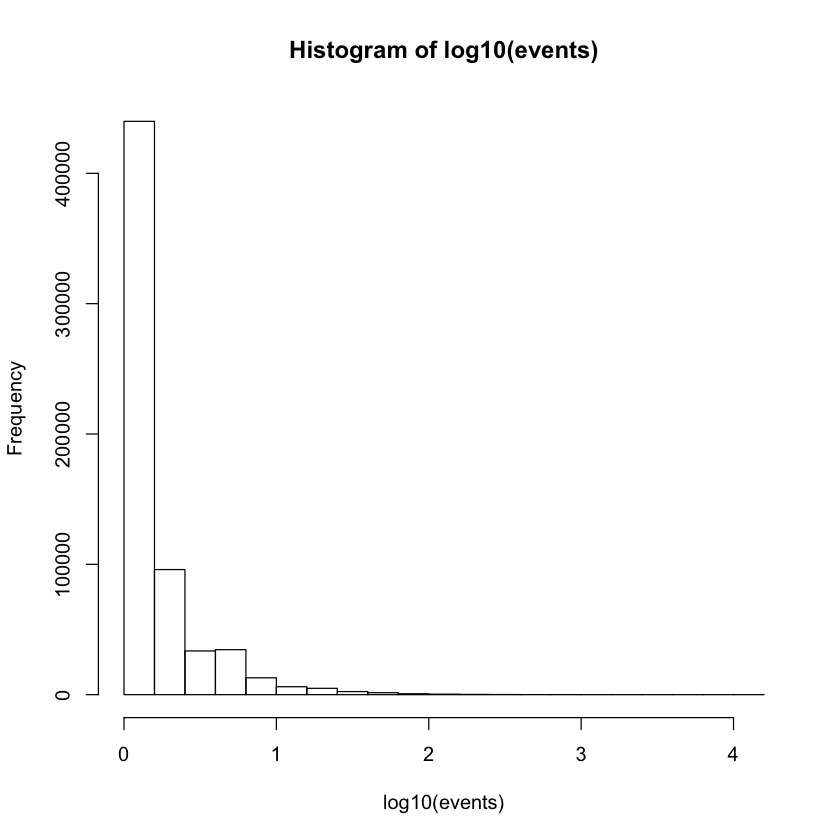

In [38]:
hist(log10(events))

In [39]:
anon_mwsessions_results$start_time <- as.POSIXct(as.character(start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [40]:
anon_mwsessions_results$end_time <- as.POSIXct(as.character(end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [41]:
anon_mwsessions_results$time_difference <- anon_mwsessions_results$end_time - anon_mwsessions_results$start_time

In [42]:
head(anon_mwsessions_results)

user,start,end,index,events,start_time,end_time,time_difference
93.220.76.159,20121029172824,20121029181646,0,2,2012-10-29 17:28:24,2012-10-29 18:16:46,2902 secs
193.40.10.178,20121029174206,20121029180514,0,4,2012-10-29 17:42:06,2012-10-29 18:05:14,1388 secs
127.0.0.1,20121029181848,20121029181849,0,18,2012-10-29 18:18:48,2012-10-29 18:18:49,1 secs
41.244.19.122,20121029202244,20121029202244,0,1,2012-10-29 20:22:44,2012-10-29 20:22:44,0 secs
99.254.150.249,20121029201348,20121029214516,0,5,2012-10-29 20:13:48,2012-10-29 21:45:16,5488 secs
46.9.165.102,20121029220423,20121029220856,0,8,2012-10-29 22:04:23,2012-10-29 22:08:56,273 secs


In [43]:
head(anon_mwsessions_results[time_difference >= 36000,])

user,start,end,index,events,start_time,end_time,time_difference
86.44.163.139,20130217143755,20130218061612,8,327,2013-02-17 14:37:55,2013-02-18 06:16:12,56297 secs
84.161.198.64,20130310103800,20130310210455,0,141,2013-03-10 10:38:00,2013-03-10 21:04:55,37615 secs
10.64.0.127,20130311224842,20130312131840,1,575,2013-03-11 22:48:42,2013-03-12 13:18:40,52198 secs
87.217.37.206,20130520102706,20130521023308,12,168,2013-05-20 10:27:06,2013-05-21 02:33:08,57962 secs
10.64.0.127,20130527091350,20130527191936,17,174,2013-05-27 09:13:50,2013-05-27 19:19:36,36346 secs
72.29.167.158,20130622114232,20130623073344,0,6971,2013-06-22 11:42:32,2013-06-23 07:33:44,71472 secs


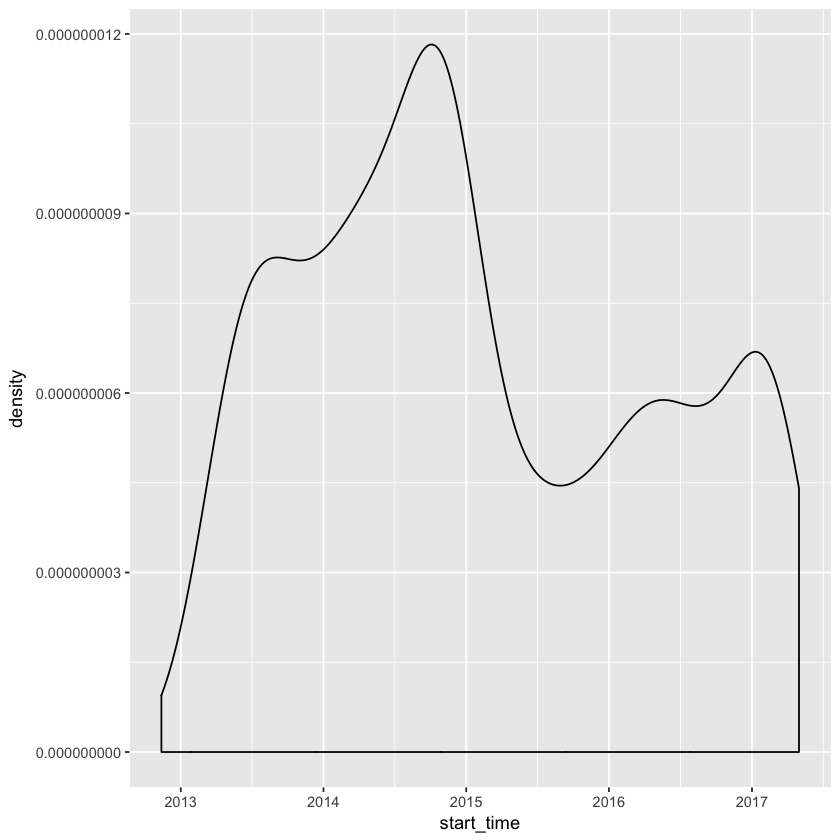

In [44]:
ggplot(anon_mwsessions_results[time_difference >= 3*60*60,],aes(x=start_time)) + geom_density()

Warning message in hist(log10(as.numeric(anon_mwsessions_results$time_difference))):
“NaNs produced”

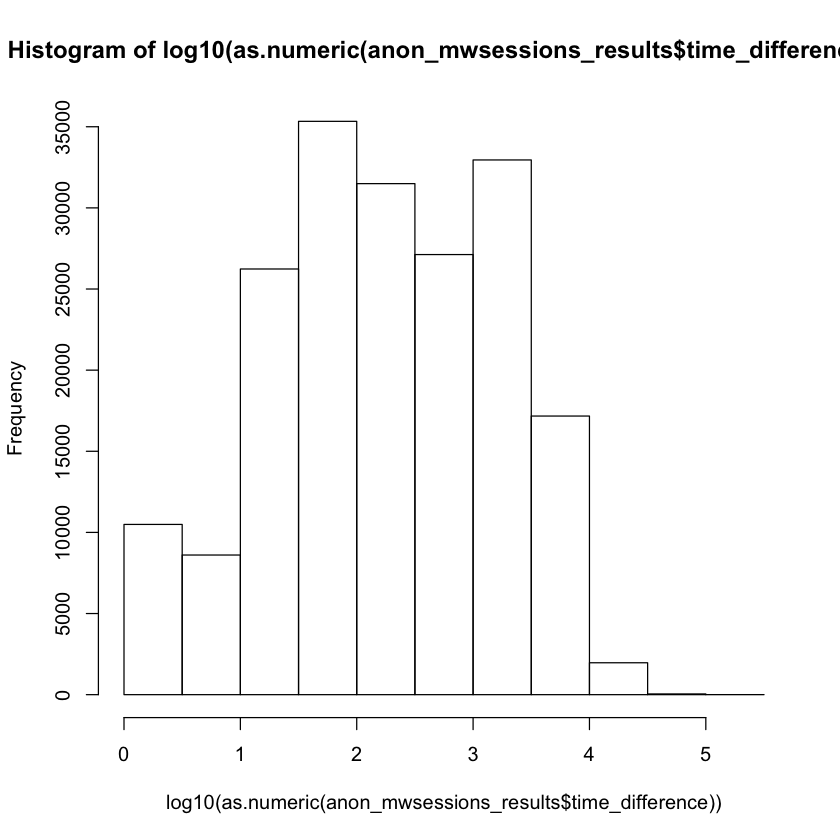

In [45]:
hist(log10(as.numeric(anon_mwsessions_results$time_difference)))

# Anon event statistics

In [46]:
max(events)

[1] 11017

In [47]:
nrow(anon_mwsessions_results)

[1] 633128

In [48]:
sessions_with_more_than_10_events <- subset(anon_mwsessions_results, events==1)

In [49]:
nrow(sessions_with_more_than_10_events)

[1] 439896

In [50]:
sessions_with_more_than_10_events <- subset(anon_mwsessions_results, events>10)

In [51]:
nrow(sessions_with_more_than_10_events)

[1] 16272

In [52]:
sessions_with_more_than_20_events <- subset(anon_mwsessions_results, events>20)

In [53]:
nrow(sessions_with_more_than_20_events)

[1] 7097

In [54]:
sessions_with_more_than_50_events <- subset(anon_mwsessions_results, events>50)

In [55]:
nrow(sessions_with_more_than_50_events)

[1] 2072

In [56]:
sessions_with_more_than_100_events <- subset(anon_mwsessions_results, events>100)

In [57]:
nrow(sessions_with_more_than_100_events)

[1] 736

In [58]:
sum(anon_mwsessions_results$events)/sum(anon_mwsessions_results$events)

[1] 1

In [59]:
sum(anon_mwsessions_results$events)

[1] 1572831

In [60]:
sorted_anon_mwsessions_results <- anon_mwsessions_results[order(-events),]

In [61]:
head(sorted_anon_mwsessions_results, n=10)

user,start,end,index,events,start_time,end_time,time_difference
10.68.17.174,20141123042702,20141126071956,40,11017,2014-11-23 04:27:02,2014-11-26 07:19:56,269574 secs
72.29.167.158,20130622114232,20130623073344,0,6971,2013-06-22 11:42:32,2013-06-23 07:33:44,71472 secs
185.54.115.189,20151112211127,20151113081803,0,3272,2015-11-12 21:11:27,2015-11-13 08:18:03,39996 secs
150.254.210.213,20130830070801,20130830235054,4,2591,2013-08-30 07:08:01,2013-08-30 23:50:54,60173 secs
89.122.248.53,20150821131251,20150824213721,4,2560,2015-08-21 13:12:51,2015-08-24 21:37:21,289470 secs
78.90.0.177,20150812232601,20150813050103,4,2538,2015-08-12 23:26:01,2015-08-13 05:01:03,20102 secs
87.170.223.74,20160223101534,20160224152634,1,2250,2016-02-23 10:15:34,2016-02-24 15:26:34,105060 secs
10.68.17.61,20141110192855,20141111003652,0,2214,2014-11-10 19:28:55,2014-11-11 00:36:52,18477 secs
150.254.210.213,20130701235102,20130702114051,0,2121,2013-07-01 23:51:02,2013-07-02 11:40:51,42589 secs
10.68.17.174,20141122054826,20141122235430,38,1865,2014-11-22 05:48:26,2014-11-22 23:54:30,65164 secs


In [62]:
sorted_anon_mwsessions_results[1,]$start

[1] 20141123042702

In [63]:
sorted_anon_mwsessions_results[1,]$end

[1] 20141126071956

In [64]:
sorted_anon_mwsessions_results[3,]$start

[1] 20151112211127

In [65]:
sorted_anon_mwsessions_results[3,]$end

[1] 20151113081803

In [66]:
data.table(subset(anon_mwsessions_results, user=='54.67.94.64'))[order(-events),]

user,start,end,index,events,start_time,end_time,time_difference
54.67.94.64,20160409102426,20160409111917,64,7,2016-04-09 10:24:26,2016-04-09 11:19:17,3291 secs
54.67.94.64,20160531211027,20160531215028,103,5,2016-05-31 21:10:27,2016-05-31 21:50:28,2401 secs
54.67.94.64,20160601044815,20160601054316,104,4,2016-06-01 04:48:15,2016-06-01 05:43:16,3301 secs
54.67.94.64,20160826215757,20160826220355,154,4,2016-08-26 21:57:57,2016-08-26 22:03:55,358 secs
54.67.94.64,20160323045408,20160323054320,46,3,2016-03-23 04:54:08,2016-03-23 05:43:20,2952 secs
54.67.94.64,20160412043249,20160412044031,70,3,2016-04-12 04:32:49,2016-04-12 04:40:31,462 secs
54.67.94.64,20161213083038,20161213091425,220,3,2016-12-13 08:30:38,2016-12-13 09:14:25,2627 secs
54.67.94.64,20170122030937,20170122031758,235,3,2017-01-22 03:09:37,2017-01-22 03:17:58,501 secs
54.67.94.64,20160218074057,20160218083827,0,2,2016-02-18 07:40:57,2016-02-18 08:38:27,3450 secs
54.67.94.64,20160219054945,20160219062740,2,2,2016-02-19 05:49:45,2016-02-19 06:27:40,2275 secs


In [67]:
rm(anon_mwsessions_results)

In [68]:
# Misalignment bucketing by event by event length

In [69]:
anon_revision_session_data <- data.table(read.table("~/Desktop/revision_session_data.tsv", header=TRUE, sep="\t"))

In [70]:
anon_revision_alignment <- data.table(read.table("../../results/sql_queries/misalignment_and_edits/anon_revision_alignment.tsv", header=FALSE, sep="\t"))

In [71]:
colnames(anon_revision_alignment) <- c('entity_id','revision_id','revision_user','quality_class', 'views_class')

In [72]:
anon_revision_session_data_and_alignment <- merge(anon_revision_session_data, anon_revision_alignment, by = "revision_id")

In [73]:
anon_revision_session_data_and_alignment$start_time <- as.POSIXct(as.character(anon_revision_session_data_and_alignment$session_start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [74]:
anon_revision_session_data_and_alignment$end_time <- as.POSIXct(as.character(anon_revision_session_data_and_alignment$session_end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [75]:
anon_revision_session_data_and_alignment$time_difference <- anon_revision_session_data_and_alignment$end_time - anon_revision_session_data_and_alignment$start_time

# less than 10

In [76]:
less_than_10_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference < 10,], user, session_start), number_of_aligned_revisions_bucket_1 = n())

In [77]:
less_than_10_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference < 10,], user, session_start), number_of_misaligned_revisions_bucket_1 = n())

In [78]:
less_than_10 <- merge(less_than_10_aligned, less_than_10_misaligned)

In [79]:
less_than_10$proportion_aligned_bucket_1 = less_than_10$number_of_aligned_revisions/(less_than_10$number_of_misaligned_revisions + less_than_10$number_of_aligned_revisions)

# between 10 and 99 seconds time difference bucket

In [80]:
from_10_to_99_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 10 & time_difference < 99,], user, session_start), number_of_aligned_revisions_bucket_2 = n())

In [81]:
from_10_to_99_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 10 & time_difference < 99,], user, session_start), number_of_misaligned_revisions_bucket_2 = n())

In [82]:
from_10_to_99 <- merge(from_10_to_99_aligned, from_10_to_99_misaligned)

In [83]:
from_10_to_99$proportion_aligned_bucket_2 = from_10_to_99$number_of_aligned_revisions/(from_10_to_99$number_of_misaligned_revisions + from_10_to_99$number_of_aligned_revisions)

# between 100 and 999 seconds time difference bucket 

In [84]:
from_100_to_999_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 100 & time_difference < 999,], user, session_start), number_of_aligned_revisions_bucket_3 = n())

In [85]:
from_100_to_999_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 100 & time_difference < 999,], user, session_start), number_of_misaligned_revisions_bucket_3 = n())

In [86]:
from_100_to_999 <- merge(from_100_to_999_aligned, from_100_to_999_misaligned)

In [87]:
from_100_to_999$proportion_aligned_bucket_3 = from_100_to_999$number_of_aligned_revisions/(from_100_to_999$number_of_misaligned_revisions + from_100_to_999$number_of_aligned_revisions)

# between 1000 and 9999 seconds time difference bucket 

In [88]:
from_1000_to_9999_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 1000 & time_difference < 9999,], user, session_start), number_of_aligned_revisions_bucket_4 = n())

In [89]:
from_1000_to_9999_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 1000 & time_difference < 9999,], user, session_start), number_of_misaligned_revisions_bucket_4 = n())

In [90]:
from_1000_to_9999 <- merge(from_1000_to_9999_aligned, from_1000_to_9999_misaligned)

In [91]:
from_1000_to_9999$proportion_aligned_bucket_4 = from_1000_to_9999$number_of_aligned_revisions/(from_1000_to_9999$number_of_misaligned_revisions + from_1000_to_9999$number_of_aligned_revisions)

# greater than or equal 10000 seconds time difference bucket 

In [92]:
greater_than_or_equal_10000_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference > 10000,], user, session_start), number_of_aligned_revisions_bucket_5 = n())

In [93]:
greater_than_or_equal_10000_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference > 10000,], user, session_start), number_of_misaligned_revisions_bucket_5 = n())

In [94]:
greater_than_or_equal_10000 <- merge(greater_than_or_equal_10000_aligned, greater_than_or_equal_10000_misaligned)

In [95]:
greater_than_or_equal_10000$proportion_aligned_bucket_5 = greater_than_or_equal_10000$number_of_aligned_revisions/(greater_than_or_equal_10000$number_of_misaligned_revisions + greater_than_or_equal_10000$number_of_aligned_revisions)

In [96]:
head(greater_than_or_equal_10000)

user,session_start,number_of_aligned_revisions_bucket_5,number_of_misaligned_revisions_bucket_5,proportion_aligned_bucket_5
10.4.1.102,20130820110544,5,398,0.01240695
10.4.1.125,20130916104144,381,323,0.54119318
10.4.1.65,20140225000014,965,721,0.57236062
10.64.0.127,20130311224842,162,413,0.28173913
10.64.0.127,20130527091350,66,108,0.37931034
10.68.16.133,20160311194108,690,226,0.75327511


In [97]:
anon_alignment_buckets = data.table(alignment_means = c(mean(less_than_10$proportion_aligned_bucket_1),
                                                     mean(from_10_to_99$proportion_aligned_bucket_2),
                                                     mean(from_100_to_999$proportion_aligned_bucket_3),
                                                     mean(from_1000_to_9999$proportion_aligned_bucket_4),
                                                     mean(greater_than_or_equal_10000$proportion_aligned_bucket_5)))

In [98]:
head(anon_alignment_buckets)

alignment_means
0.5041298
0.4966707
0.4820898
0.4669794
0.4483662
